# Loan Applicant's Risk Classification

## Importing Required Libraries

In [1]:
import pandas as pd # for Data Frame
import numpy as np # for Mathemetical Operations
import matplotlib.pyplot as plt # for Data Visulization
%matplotlib inline
import seaborn as sns # for Data Visulization
import warnings # for Ignoring Warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier # for KNN Algoritham
from sklearn.model_selection import train_test_split # for split data in to Train and Test
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

## Part - 1 : Data Exploration and Pre-processing

### 1) Load the given dataset

In [2]:
df = pd.read_excel('Loan_Applicant_Risk_Classification.xlsx')
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


### 2) Check for null values

In [3]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

### 3) Get basic information from data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


### 4) Describe the dataset

In [5]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


### 5) Display Scatterplot between age & Total work Experience

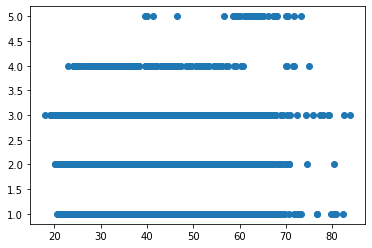

In [6]:
plt.scatter(df.Age, df['Total Work Experience'] )

### 6) Display Box Plot for age

<AxesSubplot:xlabel='Age', ylabel='count'>

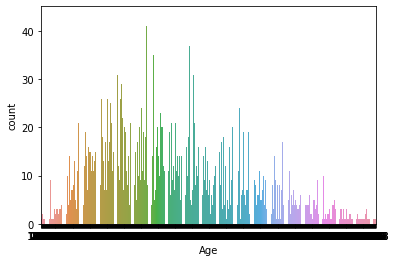

In [7]:
sns.countplot(df.Age, data=df)

### 7) Display box plot for Cibil Score

<AxesSubplot:xlabel='Cibil score', ylabel='count'>

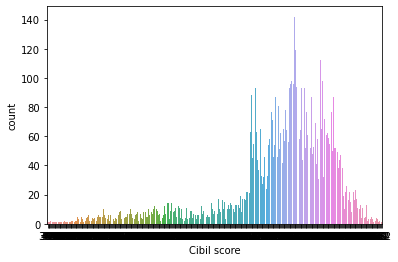

In [8]:
sns.countplot(df['Cibil score'], data=df)

### 8) Create target and feature data where target is Total bounces past12months

In [9]:
x = df.drop(['Total bounces past12months'], axis=1)
y = df[['Total bounces past12months']]

In [11]:
x.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
0,40.50,2,6,0.842666,594,0
1,41.25,5,2,0.791667,754,0
2,39.50,5,2,0.727273,779,0
3,35.00,1,4,0.820232,818,0
4,34.00,3,3,0.455581,853,0


In [12]:
y.head()

,Total bounces past12months
0,0
1,0
2,0
3,0
4,1


## Part - 2 : Working with Model

### 1) Split Data into Training and Testing

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [14]:
x_train.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
916,38.92,2,4,0.598792,838,0
6514,27.50,3,2,0.984255,759,0
8792,47.42,3,3,0.643990,725,0
4647,49.42,2,2,0.516859,827,0
171,47.92,1,4,0.844903,863,0


In [15]:
x_train.shape

(7196, 6)

In [16]:
x_test.shape

(1799, 6)

In [17]:
y_train.shape

(7196, 1)

In [18]:
y_test.shape

(1799, 1)

### 2) Create KNN classifier between Feature and target data

In [19]:
knn = KNeighborsClassifier()

In [20]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(x_test)

### 3) Display the test score

In [22]:
test_score = round(knn.score(x_test, y_test)*100, 2)

In [23]:
print('Test Score: ', test_score)

Test Score:  62.92


### 4) Display the training score

In [24]:
train_score = round(knn.score(x_train, y_train)*100, 2)

In [25]:
print('Train Score: ', train_score)

Train Score:  68.15


### 5) Print the accuracy score

In [26]:
accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

In [27]:
print('Accuracy Score: ', accuracy)

Accuracy Score:  62.92


### 6) Try 1 to 14 k values for classifiers

In [28]:
train_scores=[]
test_scores=[]

for i in range(1,15):
    
    model = KNeighborsClassifier(i)
    model.fit(x_train, y_train)
    
    train_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))

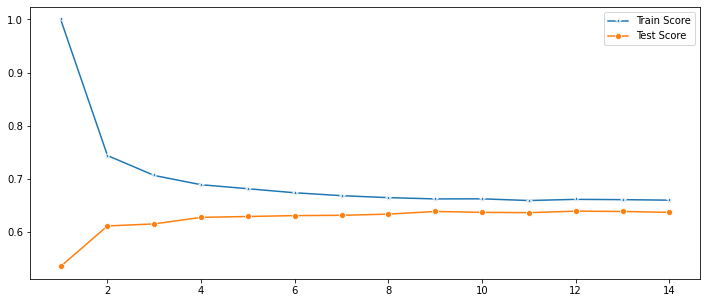

In [29]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

### Scaling data to improve accuracy

In [30]:
scaler = StandardScaler()

In [31]:
x[['Age', 'Cibil score']] = scaler.fit_transform(x[['Age', 'Cibil score']])

In [32]:
x.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
0,0.165817,2,6,0.842666,-2.345089,0
1,0.239326,5,2,0.791667,0.020304,0
2,0.067805,5,2,0.727273,0.389897,0
3,-0.373251,1,4,0.820232,0.966462,0
4,-0.471263,3,3,0.455581,1.483891,0


### Split Data into Train and Test

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
x_train.shape

(7196, 6)

In [35]:
x_test.shape

(1799, 6)

In [36]:
y_train.shape

(7196, 1)

In [37]:
y_test.shape

(1799, 1)

### Model Intilizing

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = knn.predict(x_test)

### Display Test Score

In [41]:
test_score = round(knn.score(x_test, y_test)*100, 2)

In [42]:
print('Test Score: ', test_score)

Test Score:  69.87


### Display Train Score

In [43]:
train_score = round(knn.score(x_train, y_train)*100, 2)

In [44]:
print('Train Score: ', train_score)

Train Score:  72.57


### Trying 1 to 14 k values for classifiers

In [46]:
train_scores =[]
test_scores =[]

for i in range(1,15):
    
    model = KNeighborsClassifier(i)
    model.fit(x_train, y_train)
    
    train_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))

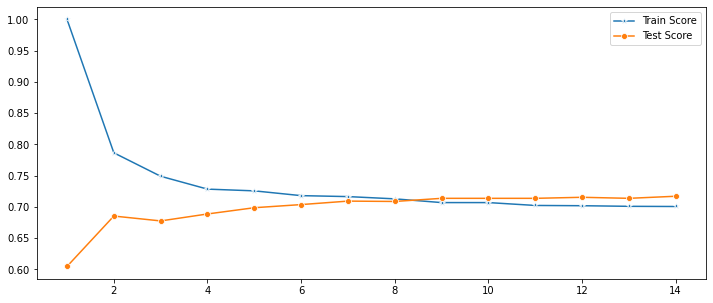

In [47]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15), train_scores, marker='*', label='Train Score')
p = sns.lineplot(range(1,15), test_scores, marker='o', label='Test Score')

### Train Model with 14 k value

In [48]:
knn = KNeighborsClassifier(14)

In [49]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [50]:
y_pred = knn.predict(x_test)

### Display Train Score

In [51]:
train_score = round(knn.score(x_train, y_train)*100, 2)

In [52]:
print('Train Score: ', train_score)

Train Score:  70.07


### Display Test Score

In [53]:
test_score = round(knn.score(x_test, y_test)*100, 2)

In [54]:
print('Test Score: ', test_score)

Test Score:  71.71


### Display Confusion Matrix

In [55]:
con_mat = confusion_matrix(y_test, y_pred)

In [56]:
print('Confusion Matrix: \n', con_mat)

Confusion Matrix: 
 [[1217    7    1    0    0    0    0    0    0    0    0    0    0]
 [ 160   53    2    2    2    1    0    0    0    0    0    0    0]
 [  54   29    8    4    1    1    0    0    0    0    0    0    0]
 [  22   22    3    1    2    0    0    0    2    2    0    0    1]
 [  20   20    4    2    1    0    0    0    0    0    1    1    2]
 [   7   14    1    0    0    1    0    0    1    1    0    0    0]
 [   4   11    2    0    0    2    0    0    1    1    0    2    0]
 [   4    8    1    3    1    1    4    0    2    2    0    0    0]
 [   5    6    0    1    5    0    0    0    3    2    0    0    0]
 [   2   10    2    1    2    1    2    1    3    3    0    0    0]
 [   2    3    0    0    1    0    1    1    2    1    0    0    1]
 [   0    6    1    0    1    0    0    0    0    0    0    3    0]
 [   0    1    0    0    0    1    0    1    0    1    0    1    0]]


### Display Accuracy Score

In [59]:
accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

print("Accuracy Score is : ",accuracy)

Accuracy Score is :  71.71
